# Lady Montagu's Letters - Continued

In this notebook, we will continue our analysis of Lady Montagu's letters. We will run through some exercises to familiarize ourselves with some tools and concepts in computational text analysis.

In [2]:
import os
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

from string import punctuation
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package punkt to /Users/ahyeoncho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ahyeoncho/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahyeoncho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Let's load our data
montagu = pd.read_csv('../Data/montagu/montagu_letters_v2.csv')
montagu.head()

,filename,title,addressee,location_original,location_edited,location_wikidata,latitude,longitude,date_original,date_edited,body,body_cleaned
0,letter_1.txt,LETTER I.,TO THE COUNTESS OF ——.,Rotterdam,Rotterdam,Q34370,51.92,4.480000,Aug. 3. O. S. 1716.,1716-08-03,"I FLATTER, myself, dear sister, that I shall g...","I FLATTER, myself, dear sister, that I shall g..."
1,letter_2.txt,LET. II,TO MRS. S——.,Hague,Hague,Q36600,52.08,4.310000,Aug. 5. O. S. 1716.,1716-08-05,"I MAKE haste to tell you, dear Madam, that, af...","I MAKE haste to tell you, dear Madam, that, af..."
2,letter_3.txt,LET. III,TO MRS. S. C.,Nimeguen,Nimeguen,Q47887,51.8475,5.862500,Aug.13. O. S. 1716.,1716-08-13,"I AM extremely sorry, my dear S. that your fea...","I AM extremely sorry, my dear S. that your fea..."
3,letter_4.txt,LET. IV.,TO THE LADY ——.,Cologn (sic),Cologne,Q365,50.94222222,6.957778,"Aug, 16. O. S. 1716.",1716-08-16,IF my lady —— could have any notion of the fat...,IF my lady —— could have any notion of the fat...
4,letter_5.txt,LET. V.,TO THE COUNTESS OF B——.,Nuremberg,Nuremberg,Q2090,49.45388889,11.077500,Aug. 22. O. S. 1716.,1716-08-22,"AFTER five days travelling post, I could not s...","AFTER five days travelling post, I could not s..."


## Word and Other Counts

In [4]:
# Let's get all the letters from the dataset
letters = montagu['body_cleaned'].tolist()
print(len(letters))
print(letters[0])


58
I FLATTER, myself, dear sister, that I shall give you some pleasure in letting you know that I have safely passed the sea, though we had the ill fortune of a storm. We were persuaded by the captain of the yacht to set out in a calm, and he pretended there was nothing so easy as to tide it over; but, after two days slowly moving, the wind blew so hard, that none of the sailors could keep their feet, and we were all Sunday night tossed very handsomely. I never saw a man more frighted (sic) than the captain. For my part, I have been so lucky, neither to suffer from fear nor seasickness; though, I confess, I was so impatient to see myself once more upon dry land, that I would not stay till the yacht could get to Rotterdam, but went in the long-boat to Helvoetsluys, where we had voitures to carry us to the Briel. I was charmed with the neatness of that little town; but my arrival at Rotterdam presented me a new scene of pleasure. All the streets are paved with broad stones, and before ma

In [5]:
# Let's get word counts for each letter and save it to the dataframe

montagu["word_count"] = montagu["body_cleaned"].apply(lambda text: len(word_tokenize(text)))

# Let's take a quick look at the first few rows to verify the new column
montagu[["body_cleaned", "word_count"]].head()


,body_cleaned,word_count
0,"I FLATTER, myself, dear sister, that I shall g...",633
1,"I MAKE haste to tell you, dear Madam, that, af...",344
2,"I AM extremely sorry, my dear S. that your fea...",573
3,IF my lady —— could have any notion of the fat...,576
4,"AFTER five days travelling post, I could not s...",743


In [6]:
# Now let's get the number of sentences in the same way too

montagu["sentence_count"] = montagu["body_cleaned"].apply(lambda text: len(sent_tokenize(text)))

# Let's take a quick look at the first few rows to verify the new column
montagu[["body_cleaned", "sentence_count"]].head()



,body_cleaned,sentence_count
0,"I FLATTER, myself, dear sister, that I shall g...",18
1,"I MAKE haste to tell you, dear Madam, that, af...",12
2,"I AM extremely sorry, my dear S. that your fea...",18
3,IF my lady —— could have any notion of the fat...,12
4,"AFTER five days travelling post, I could not s...",18


In [7]:
# Get a summary of statistics for both columns
summary_stats = montagu[["word_count", "sentence_count"]].describe()

print(summary_stats)

        word_count  sentence_count
count    58.000000       58.000000
mean   1358.275862       48.431034
std     853.906375       83.688670
min     166.000000        3.000000
25%     743.250000       19.000000
50%    1116.500000       31.000000
75%    1758.000000       47.000000
max    4223.000000      637.000000


## Interpretation of Word Count and Sentence Count Summary Statistics

### Word Count:
- **Count (58)**: There are 58 letters in the dataset, each with a corresponding word count.
- **Mean (1358.28)**: The average word count across all letters is approximately **1358 words**. This indicates that, on average, each letter has about 1358 words.
- **Standard Deviation (853.91)**: The standard deviation is quite high, suggesting a **wide spread** in word count. Some letters are significantly longer, while others are much shorter.
- **Min (166)**: The shortest letter has **166 words**, indicating that there are some very short letters in the dataset.
- **25th Percentile (743.25)**: 25% of the letters have fewer than **743 words**. This provides insight into the lower end of letter lengths.
- **Median (1116.5)**: The median word count is **1116.5 words**, which means that half of the letters have fewer than 1116.5 words, and the other half have more. The **right skew** of the data (mean > median) suggests that some very long letters are influencing the average.
- **75th Percentile (1758)**: 75% of the letters have fewer than **1758 words**.
- **Max (4223)**: The longest letter has **4223 words**, which is a significant outlier compared to most of the other letters.

### Sentence Count:
- **Count (58)**: There are also 58 letters with sentence counts.
- **Mean (48.43)**: The average sentence count is approximately **48 sentences** per letter, indicating that most letters are composed of just under 50 sentences.
- **Standard Deviation (83.69)**: The large standard deviation suggests that the number of sentences per letter varies greatly, with some letters being much longer in terms of sentence count.
- **Min (3)**: The letter with the fewest sentences contains only **3 sentences**.
- **25th Percentile (19)**: 25% of the letters contain fewer than **19 sentences**.
- **Median (31)**: The median sentence count is **31 sentences**, meaning that half of the letters contain fewer than 31 sentences, and half have more.
- **75th Percentile (47)**: 75% of the letters have fewer than **47 sentences**.
- **Max (637)**: The letter with the highest sentence count has **637 sentences**, which is an extreme outlier. This suggests that this letter is unusually detailed or lengthy.

### Key Insights:
- **Word Count**: The word count distribution is **right-skewed**, meaning most letters are relatively short, but there are a few very long letters (e.g., the maximum of 4223 words) that pull the average up. The letters generally fall between **166 and 1758 words**.
- **Sentence Count**: Similarly, the sentence count distribution is **right-skewed**. The majority of the letters have between **20 and 50 sentences**, with a few extreme outliers (the maximum of 637 sentences).
  
### Overall Interpretation:
- **Word Count**: The letters are generally moderate in length, but there are some very long outliers. The dataset contains mostly shorter letters, with a few long letters driving up the average word count.
- **Sentence Count**: The sentence count is spread out, with most letters having between 20 and 50 sentences. However, a few letters contain significantly more sentences, suggesting that some letters are more detailed or formal than others.



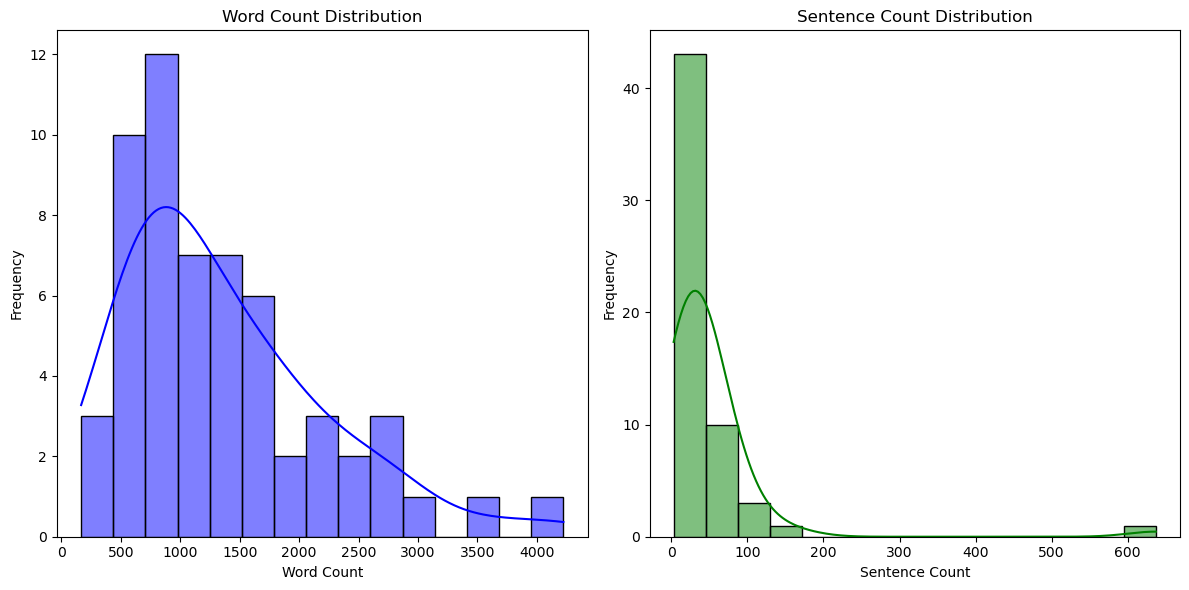

In [8]:
# Let's plot the word counts and sentence counts across all letters
# Plotting Word Count and Sentence Count Distributions with Seaborn
plt.figure(figsize=(12, 6))

# Word Count Distribution
plt.subplot(1, 2, 1)
sns.histplot(montagu["word_count"], kde=True, color='blue', bins=15)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Sentence Count Distribution
plt.subplot(1, 2, 2)
sns.histplot(montagu["sentence_count"], kde=True, color='green', bins=15)
plt.title("Sentence Count Distribution")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Now that we got a sense of the distributions, we can experiment with all of the letters together

In [11]:
type(letters)

list

In [13]:
type(letters[1])

str

In [14]:
# Join the text data into a single string
letter_texts = " ".join(letters)

In [16]:
# Tokenize the text
tokens = word_tokenize(letter_texts)

In [18]:
print(tokens[:25])

['I', 'FLATTER', ',', 'myself', ',', 'dear', 'sister', ',', 'that', 'I', 'shall', 'give', 'you', 'some', 'pleasure', 'in', 'letting', 'you', 'know', 'that', 'I', 'have', 'safely', 'passed', 'the']


In [19]:
# Remove stopwords and non-alphabetic tokens
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
filtered_tokens[:10]

['flatter',
 'dear',
 'sister',
 'shall',
 'give',
 'pleasure',
 'letting',
 'know',
 'safely',
 'passed']

In [20]:
# Remove stopwords and non-alphabetic tokens
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
filtered_tokens[:10]

['flatter',
 'dear',
 'sister',
 'shall',
 'give',
 'pleasure',
 'letting',
 'know',
 'safely',
 'passed']

In [21]:
# Create a frequency distribution of words
freq_dist = nltk.FreqDist(filtered_tokens)
print(len(freq_dist))
# Display the 10 most common words
print(freq_dist.most_common(10))

6946
[('one', 225), ('much', 177), ('great', 172), ('would', 153), ('see', 147), ('upon', 135), ('little', 129), ('two', 119), ('sic', 116), ('well', 109)]


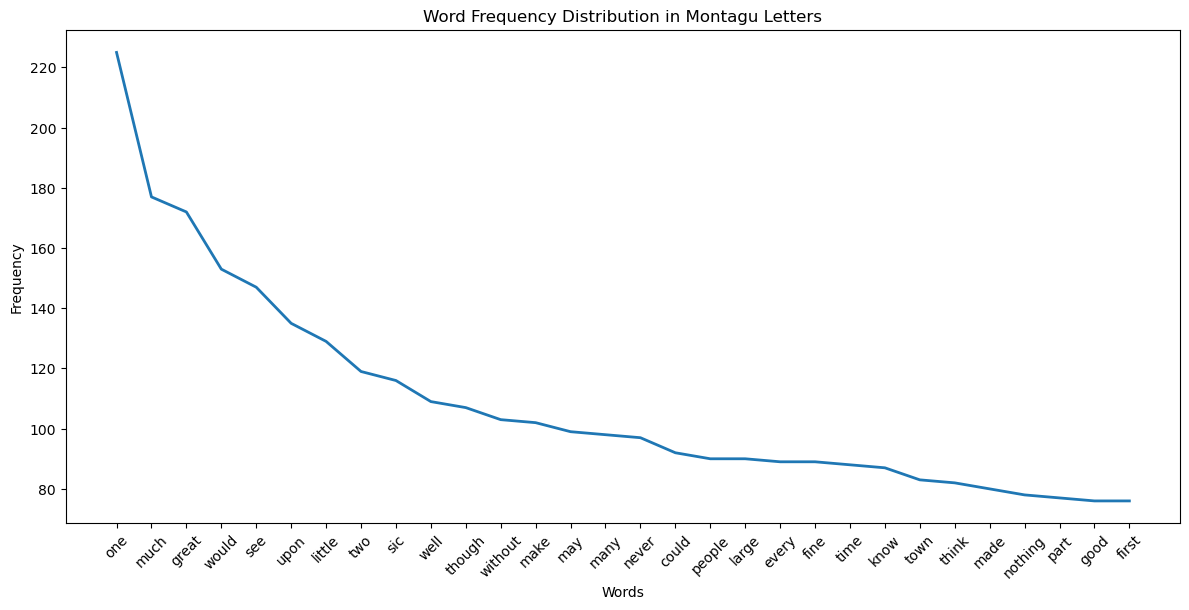

In [22]:
# Let's plot the frequency distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False) # 30 most common words
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.grid(False)# no grid
plt.title("Word Frequency Distribution in Montagu Letters")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

What do we think of this? What is this telling us about the contents of these letters?

## Word Clouds

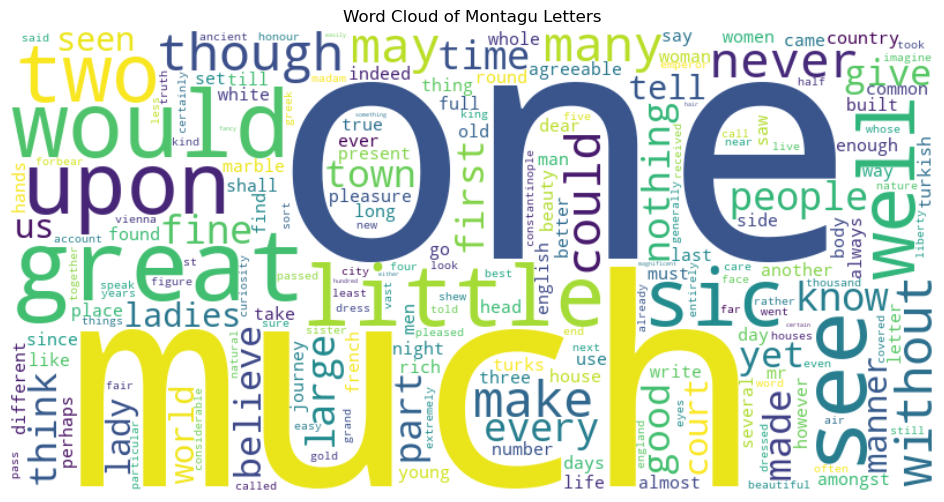

In [23]:
from wordcloud import WordCloud
# Generate a word cloud from the frequency distribution
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of Montagu Letters")
plt.show()

A bit too busy and rather hard to read. Let's change things around a bit

In [24]:
# First, let's take a closer look at what happens after the first 50 words
# print(freq_dist.most_common(50)) # This is how we would display the first 50 most common words
# now let's print the most common words after the first 50

fifty_to_100 = freq_dist.most_common(100)[50:] # Display words from 51st to 100th most common
for word , count in fifty_to_100:
    print(f"{word}: {count}")



must: 57
since: 57
letter: 56
men: 56
however: 56
shall: 55
whole: 55
true: 55
enough: 54
place: 54
saw: 53
like: 52
long: 52
day: 50
another: 50
young: 50
women: 50
set: 49
take: 49
amongst: 49
several: 48
found: 48
find: 47
thing: 47
round: 47
beauty: 46
three: 46
turks: 46
days: 45
full: 44
present: 44
built: 44
go: 43
english: 43
use: 42
almost: 41
woman: 41
indeed: 41
night: 40
always: 40
last: 40
number: 40
body: 40
mr: 40
marble: 40
till: 39
write: 39
life: 39
head: 38
way: 38


In [25]:
# Let's also look at the least common words
least_common = freq_dist.most_common()[-50:]  # Get the last 50 least common words
for word, count in least_common:
    print(f"{word}: {count}")

unmixed: 1
frenchman: 1
grandmother: 1
muscovites: 1
asiatics: 1
species: 1
whites: 1
woolly: 1
blacks: 1
beardless: 1
brasilians: 1
zemblians: 1
specific: 1
differences: 1
mastiffs: 1
spaniels: 1
offended: 1
intermixing: 1
causes: 1
subdivided: 1
endless: 1
remarked: 1
perfidiousness: 1
diffidence: 1
arrogance: 1
loquacity: 1
seized: 1
thoughtfulness: 1
bordering: 1
inherited: 1
progenitors: 1
proceeds: 1
fantastical: 1
conjunction: 1
male: 1
natures: 1
extremes: 1
differing: 1
atoms: 1
jarring: 1
external: 1
fishy: 1
streaked: 1
expensiveness: 1
frugality: 1
purchase: 1
adorning: 1
enamoured: 1
hoop: 1
singularities: 1


All that is to say, it is not super straightforward to work with word frequencies, especially in a corpus of this medium size. 

But all is not lost! Let's go back to the letters and get rid of the words in our frequency distribution that appear in more than 50% of the letters


In [26]:
def create_word_in_letter_freq(letters):
    """
    This function creates a frequency distribution that counts how many different letters each word appears in. 
    It uses a set to ensure that words are counted only once per letter.
    """
    word_in_letter_freq = Counter()
    
    for letter in letters:
        tokens = set(word_tokenize(letter.lower()))  # using set to count each word once per letter
        for token in tokens:
            if token.isalpha():  # ignore non-alphabetic tokens
                word_in_letter_freq[token] += 1
    
    return word_in_letter_freq


In [27]:
def remove_common_words(freq_dist, word_in_letter_freq, letters, threshold=0.5):
    """ 
    This function removes words from the frequency distribution (freq_dist) if they appear in more than 50% of the letters. 
    The threshold can be adjusted as needed.
    """
    # Calculate the threshold for common words
    total_letters = len(letters)
    common_words = {word for word, count in word_in_letter_freq.items() if count / total_letters > threshold}
    
    # Remove common words from the frequency distribution
    cleaned_freq_dist = {word: count for word, count in freq_dist.items() if word not in common_words}
    
    return cleaned_freq_dist

In [28]:
# Create the word_in_letter_freq (frequency of word occurrence across letters)
word_in_letter_freq = create_word_in_letter_freq(letters)


In [29]:
# Clean the frequency distribution by removing common words
cleaned_freq_dist = remove_common_words(freq_dist, word_in_letter_freq, letters, threshold=0.5)
print(len(cleaned_freq_dist))  # Print the number of unique words after cleaning
# Print the cleaned frequency distribution in descending order of frequency
cleaned_freq_dist = dict(sorted(cleaned_freq_dist.items(), key=lambda item: item[1], reverse=True))
print("Cleaned Frequency Distribution:")
for word, count in cleaned_freq_dist.items():
    print(f"{word}: {count}")

6879
Cleaned Frequency Distribution:
us: 68
turkish: 58
saw: 53
like: 52
another: 50
young: 50
women: 50
amongst: 49
found: 48
round: 47
beauty: 46
three: 46
turks: 46
days: 45
full: 44
built: 44
go: 43
english: 43
use: 42
almost: 41
woman: 41
indeed: 41
night: 40
always: 40
last: 40
number: 40
body: 40
mr: 40
marble: 40
till: 39
write: 39
life: 39
head: 38
way: 38
side: 38
old: 38
perhaps: 38
white: 38
common: 37
journey: 37
french: 37
rich: 37
different: 37
hands: 37
better: 36
came: 36
imagine: 36
honour: 36
king: 36
vienna: 36
emperor: 36
beautiful: 36
constantinople: 36
certainly: 35
air: 35
account: 35
gold: 35
vast: 35
things: 35
generally: 35
easy: 34
houses: 34
pleased: 34
called: 34
curiosity: 34
often: 34
even: 34
eyes: 34
passed: 33
new: 33
extremely: 33
nature: 33
ancient: 33
best: 33
face: 33
said: 33
greek: 33
sister: 32
still: 32
four: 32
look: 32
half: 32
told: 32
rather: 31
less: 31
speak: 31
end: 31
years: 31
near: 30
call: 30
sort: 30
five: 30
truth: 30
whose: 30
al

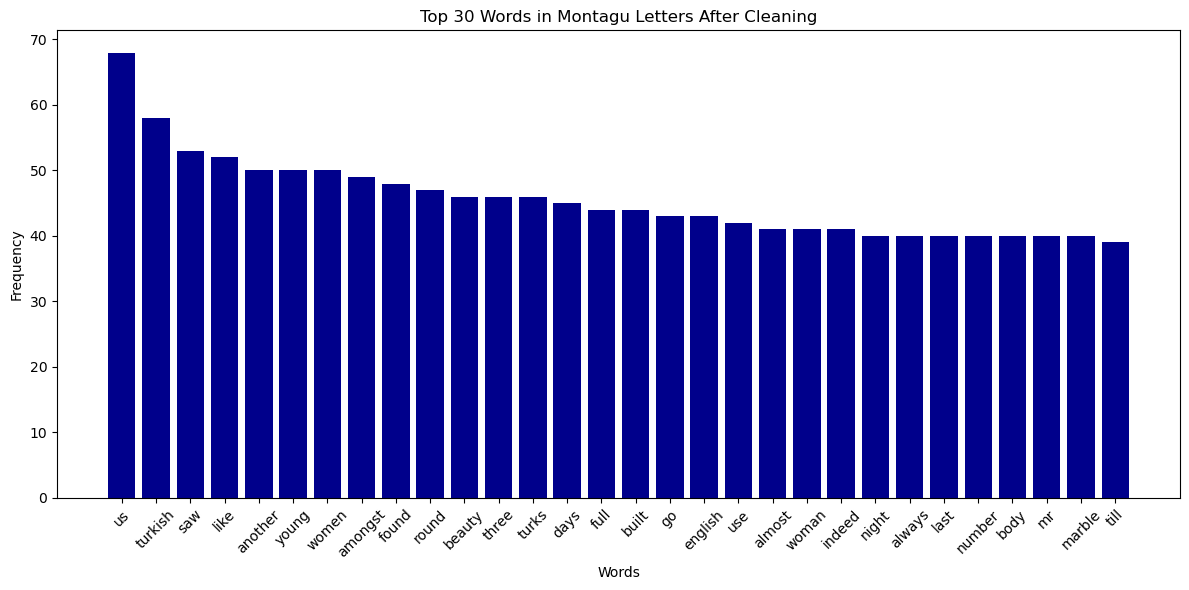

In [30]:
# Let's see the cleaned frequency distribution in a plot
# Let's plot the top 30 cleaned words
top_30 = sorted(cleaned_freq_dist.items(), key=lambda x: x[1], reverse=True)[:30]
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_30), color='darkblue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Top 30 Words in Montagu Letters After Cleaning")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.grid(False)  # no grid
plt.show()


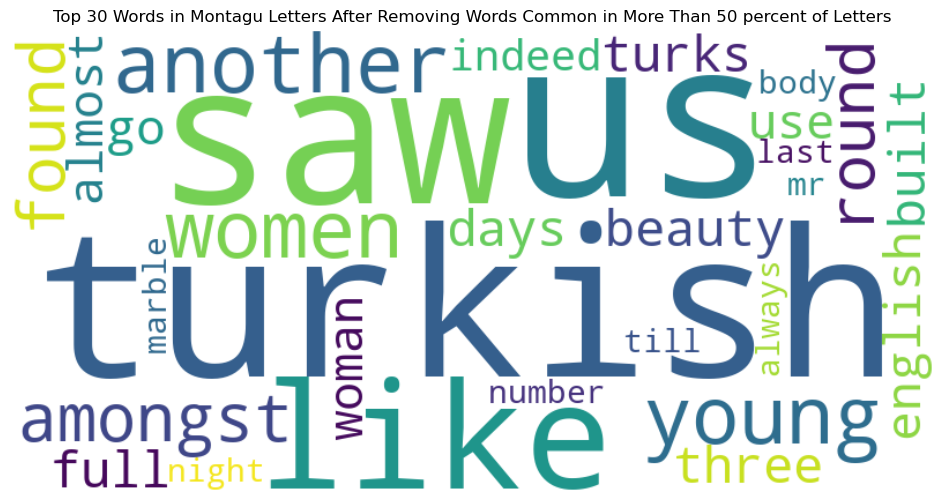

In [31]:
# Let's see the same in a word cloud
# Generate a word cloud from the cleaned frequency distribution
wordcloud_cleaned = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_30))
# Display the cleaned word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Top 30 Words in Montagu Letters After Removing Words Common in More Than 50 percent of Letters")
plt.show()

Bonus! We can change the colors

In [32]:
# Custom color paletter based on the official colors of UC Berkeley
# https://brand.berkeley.edu/visual-identity/colors/

color_palette = ['#002676', '#324262', '#655f4f', '#977b3b', '#ca9828', '#fdb515']

In [33]:
# This is a bit more finicy because we need to create a custom colormap
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", color_palette)

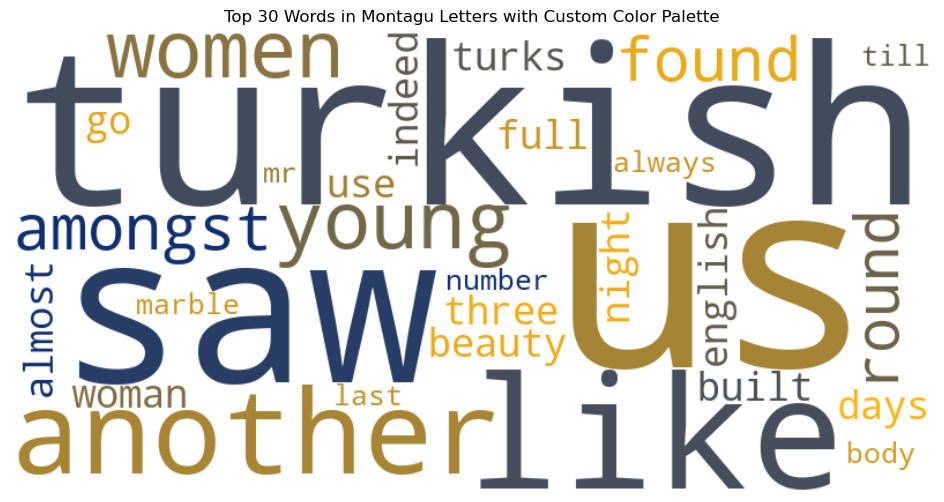

In [34]:
# Let's incorporate the custom color palette into the word cloud
wordcloud_custom = WordCloud(width=800, height=400, background_color='white', colormap=custom_cmap).generate_from_frequencies(dict(top_30))
# Display the word cloud with the custom color palette
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_custom, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Top 30 Words in Montagu Letters with Custom Color Palette")
plt.show()

Another alternative to counting words is counting bigrams

Bigrams are pairs of words that occur side by side.

In [35]:
# Let's create a frequency distribution of the bigrams in the letters
from nltk.util import bigrams

# Initialize the Counter for bigram frequencies
bigram_freq = Counter()

# Iterate over the letters and extract bigrams
for letter in letters:
# Tokenize and lowercased words, removing non-alphabetic characters and stopwords
    tokens = [word.lower() for word in word_tokenize(letter) if word.isalpha() and word not in stop_words]
    bigram_freq.update(bigrams(tokens))  # Create and update bigrams

# Display the 20 most common bigrams
for bigram in bigram_freq.most_common(20):
    print(f"{bigram[0][0]} {bigram[0][1]}: {bigram[1]}")  # Print bigram and its frequency


i think: 47
i know: 41
though i: 40
i could: 39
i believe: 36
i shall: 31
but i: 30
i seen: 29
dear sister: 26
i must: 26
i assure: 24
i see: 24
you may: 24
i never: 23
i would: 19
i saw: 19
grand signior: 18
i much: 17
i sure: 17
i am: 17


It seems like there are a lot of word pairs with 'I' which makes a lot of sense considering these are personal letters!

## Part-of-Speech Tagging

POS tagging (Part-of-Speech tagging) is the process of assigning a specific part-of-speech category (e.g., noun, verb, adjective, etc.) to each word in a sentence. This helps in understanding the grammatical structure of a sentence and is a key step in many natural language processing (NLP) tasks such as information extraction, machine translation, and text analysis.

POS tags typically include categories like:

- Nouns (e.g., "dog", "city")

- Verbs (e.g., "run", "is")

- Adjectives (e.g., "quick", "beautiful")

- Adverbs (e.g., "quickly", "very")

- Pronouns (e.g., "he", "they")

- Prepositions (e.g., "in", "on")

- Conjunctions (e.g., "and", "but")




In [36]:
# These libraries are used for tokenization and POS tagging

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger_eng') 

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ahyeoncho/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [37]:
letter_35 = montagu['body_cleaned'].iloc[34]
print(letter_35)

I HAVE had the advantage of very fine weather, all my journey; and as the summer is now in its beauty, I enjoyed the pleasure of fine prospects; and the meadows being full of all sorts of garden flowers, and sweet herbs, my berlin perfumed the air as it pressed them. The grand signior furnished us with thirty covered waggons for our baggage, and five coaches of the country for my women. We found the road full of the great spahis and their equipages coming out of Asia to the war. They always travel with tents; but I chose to ly in houses all the way. I will not trouble you with the names of the villages we passed, in which there was nothing remarkable, but at Ciorlei, where there was a conac, or little seraglio, built for the use of the grand signior, when he goes this road. I had the curiosity to view all the apartments destined for the ladies of his court. They were in the midst of a thick grove of trees, made fresh by fountains; but I was most surprised to see the walls almost covere

In [38]:
print(f"Length of letter 35: {len(letter_35)} characters")
print(f"Number of words in letter 35: {len(letter_35.split())} words")

Length of letter 35: 9685 characters
Number of words in letter 35: 1799 words


In [39]:
letter_35_lower = letter_35.lower()
unique_words = set(letter_35_lower.split())
print(f"Unique words in letter 35 (lowercase): {len(unique_words)}")

Unique words in letter 35 (lowercase): 760


In [40]:
sentences = sent_tokenize(letter_35_lower)

# Sentence tokenization results in a list of sentences
print(f"Number of sentences in letter 35: {len(sentences)}")

for sentence in sentences[:5]:
    print(sentence)
    print()

Number of sentences in letter 35: 69
i have had the advantage of very fine weather, all my journey; and as the summer is now in its beauty, i enjoyed the pleasure of fine prospects; and the meadows being full of all sorts of garden flowers, and sweet herbs, my berlin perfumed the air as it pressed them.

the grand signior furnished us with thirty covered waggons for our baggage, and five coaches of the country for my women.

we found the road full of the great spahis and their equipages coming out of asia to the war.

they always travel with tents; but i chose to ly in houses all the way.

i will not trouble you with the names of the villages we passed, in which there was nothing remarkable, but at ciorlei, where there was a conac, or little seraglio, built for the use of the grand signior, when he goes this road.



In [41]:
# Sample sentence for POS tagging
sample_sentence = sentences[0]  # First sentence for demonstration

# Apply POS tagging
pos_tags = pos_tag(word_tokenize(sample_sentence))

print(f"POS Tags for the sample sentence: {pos_tags}")


POS Tags for the sample sentence: [('i', 'NN'), ('have', 'VBP'), ('had', 'VBN'), ('the', 'DT'), ('advantage', 'NN'), ('of', 'IN'), ('very', 'RB'), ('fine', 'JJ'), ('weather', 'NN'), (',', ','), ('all', 'DT'), ('my', 'PRP$'), ('journey', 'NN'), (';', ':'), ('and', 'CC'), ('as', 'IN'), ('the', 'DT'), ('summer', 'NN'), ('is', 'VBZ'), ('now', 'RB'), ('in', 'IN'), ('its', 'PRP$'), ('beauty', 'NN'), (',', ','), ('i', 'JJ'), ('enjoyed', 'VBD'), ('the', 'DT'), ('pleasure', 'NN'), ('of', 'IN'), ('fine', 'JJ'), ('prospects', 'NNS'), (';', ':'), ('and', 'CC'), ('the', 'DT'), ('meadows', 'NNS'), ('being', 'VBG'), ('full', 'JJ'), ('of', 'IN'), ('all', 'DT'), ('sorts', 'NNS'), ('of', 'IN'), ('garden', 'NN'), ('flowers', 'NNS'), (',', ','), ('and', 'CC'), ('sweet', 'JJ'), ('herbs', 'NN'), (',', ','), ('my', 'PRP$'), ('berlin', 'NN'), ('perfumed', 'VBD'), ('the', 'DT'), ('air', 'NN'), ('as', 'IN'), ('it', 'PRP'), ('pressed', 'VBD'), ('them', 'PRP'), ('.', '.')]


### POS Tags in this example

- **NN (Noun, Singular)**: Represents singular nouns.
    - *advantage, weather, journey, summer, beauty, pleasure, prospects, meadows, flowers, herbs, air*

- **VBP (Verb, Non-3rd Person Singular Present)**: A verb in the present tense used with subjects other than third-person singular (he/she/it).
    - *have*

- **VBN (Verb, Past Participle)**: A verb in past participle form, often used with auxiliary verbs.
    - *had*

- **DT (Determiner)**: A word that introduces a noun.
    - *the, all*

- **IN (Preposition/Subordinating Conjunction)**: Used to show relationships between elements in the sentence.
    - *of, in, as*

- **RB (Adverb)**: Modifies or describes a verb, adjective, or another adverb.
    - *very, now*

- **JJ (Adjective)**: Describes or modifies a noun.
    - *fine, sweet*

- **PRP$ (Possessive Pronoun)**: A pronoun that shows ownership or possession.
    - *my, its*

- **VBD (Verb, Past Tense)**: A verb in the simple past tense.
    - *enjoyed, perfumed, pressed*

- **CC (Coordinating Conjunction)**: Used to connect words, phrases, or clauses of equal importance.
    - *and*

- **PRP (Personal Pronoun)**: Refers to a person or thing.
    - *I, it, them*

- **NNS (Noun, Plural)**: Represents plural nouns.
    - *prospects, meadows, sorts, flowers, herbs*

- **. (Punctuation)**: Marks the end of a sentence or clause.
    - *.*


### What can we do with POS Tagging?

We can analyze the structure of the sentences, identify parts of speech, and even extract specific types of words.

For example, we can extract all adjectives from this letter.

In [42]:
# What can we do with POS Tagging?
# We can analyze the structure of the sentences, identify parts of speech, and even extract specific types of words.
# For example, we can extract all adjectives from this letter.

# First we need to create a function that extracts adjectives from a sentence
def extract_adjectives(sentence):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]  # 'JJ' is the tag for adjectives
    return adjectives

In [43]:
# Let's check to see that our function works
sample_sentence = sentences[0]  # First sentence for demonstration
adjectives = extract_adjectives(sample_sentence)
print(f"Adjectives in the sample sentence: {adjectives}")

Adjectives in the sample sentence: ['fine', 'i', 'fine', 'full', 'sweet']


In [44]:
# We can improve our function by filtering out certain words that are not adjectives

# Here we rely on a simple heuristic: if the word that is tagged as an adjective is followed by a noun, it is likely an adjective.

def extract_adjectives_improved(sentence):
    sentence = sentence.lower()  # Convert to lowercase for consistency
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    adjectives = []
    for i in range(len(tagged_words) - 1):
        current_word, current_tag = tagged_words[i]
        next_word, next_tag = tagged_words[i + 1]
        if current_tag.startswith('JJ') and next_tag.startswith('NN'):
            adjectives.append(current_word)
    return adjectives

In [45]:
print(extract_adjectives_improved(sample_sentence))

['fine', 'fine', 'sweet']


In [46]:
# Let's get adjectives from all sentences in the letter
all_adjectives = []
for sentence in sentences:
    adjectives = extract_adjectives_improved(sentence)
    all_adjectives.extend(adjectives)

print(all_adjectives)

['fine', 'fine', 'sweet', 'grand', 'great', 'little', 'grand', 'thick', 'little', 'turkish', 'ancient', 'next', 'noble', 'good', 'thirty-two', 'famous', 'greek', 'greek', 'ill-built', 'same', 'roman-catholic', 'finest', 'monstrous', 'more', 'good', 'great', 'kujuk', 'little', 'pleasant', 'large', 'marble', 'good', 'agreeable', 'own', 'tall', 'nest', 'fifty', 'best', 'next', 'good', 'young', 'high', 'distant', 'beautiful', 'french', 'own', 'i', 'whole', 'vast', 'several', 'inconsiderable', 'great', 'other', 'ancient', 'fine', 'different', 'simple', 'other', 'particular', 'great', 'i', 'solemn', 'other', 'other', 'forth', 'public', 'celestial', 'inferior', 'good', 'eternal', 'ten', 'useless', 'perpetual', 'greek', 'professed', 'valuable', 'macedonian', 'greek', 'grand', 'great', 'best', 'greek', 'same', 'great', 'considerable', 'god', 'old', 'close', 'famous']


### Why extend and not append?

Last week we learnt to use `append()` to add an element to a list. Now we are using `extend()` instead. Why?

`append()` simply adds 'adjectives' in each iteration of the for loop to the list 'all_adjectives'. In this case 'adjectives' is also a list. This means that if we used `append()` we would be creating a list of lists. What we actually want is to create a list of strings, so we need to `extend()` our list 'all_adjectives' with the strings in the list 'adjectives' every time that list is created. 

In [47]:
# Let's get the unique adjectives from the letter and count them
print(f"Unique adjectives in letter 35: {len(set(all_adjectives))}")

Unique adjectives in letter 35: 60


In [48]:
# Let's see all the unique adjectives in the letter and their counts
from collections import Counter
adjective_counts = Counter(all_adjectives)

# Print the most common 10 adjectives
for adj in adjective_counts.most_common(10):
    print(f"{adj[0]}: {adj[1]}")


great: 6
good: 5
greek: 5
other: 4
fine: 3
grand: 3
little: 3
ancient: 2
next: 2
famous: 2


In [49]:
# Perfect! Now let's do this for all letters in the dataset and save the results in a new column in the DataFrame
montagu['adjectives'] = montagu['body_cleaned'].apply(lambda x: extract_adjectives_improved(x))

In [50]:
# Finally, let's get all the unique adjectives from all letters and their counts

adjectives_all_letters = []
for adjectives in montagu['adjectives']:
    adjectives_all_letters.extend(adjectives)

adjective_counts_all_letters = Counter(adjectives_all_letters)

for adj in adjective_counts_all_letters.most_common(10):
    print(f"{adj[0]}: {adj[1]}")



great: 156
other: 91
same: 85
little: 82
own: 63
fine: 61
good: 59
large: 53
turkish: 51
dear: 50


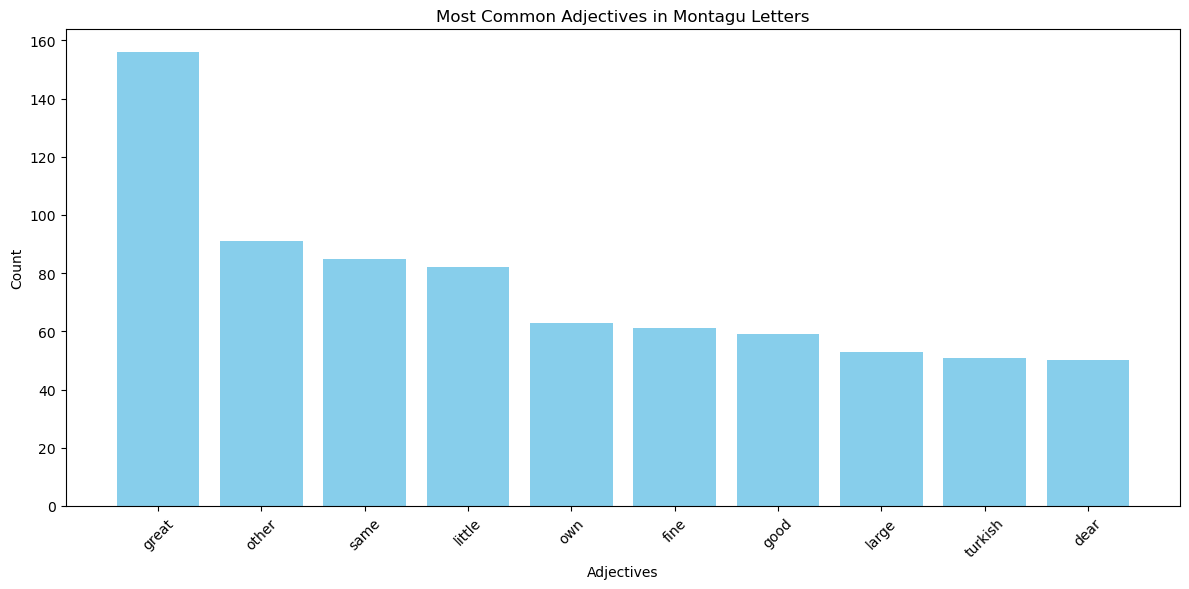

In [51]:
# Let's visualize the most common adjectives in a bar chart
import matplotlib.pyplot as plt
# Get the most common adjectives and their counts
most_common_adjectives = adjective_counts_all_letters.most_common(10)
adjectives, counts = zip(*most_common_adjectives)
plt.figure(figsize=(12, 6))
plt.bar(adjectives, counts, color='skyblue')
plt.xlabel('Adjectives')
plt.ylabel('Count')
plt.title('Most Common Adjectives in Montagu Letters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Another Example with POS Tagging

Let's extract nouns. Adjectives showed us hints about the sentiments in this corpus and nouns could get us closer to the topics of analysis

In [52]:
# This time, we will get POS tags for all letters and save them in a new column in the DataFrame
montagu['pos_tags'] = montagu['body_cleaned'].apply(lambda x: pos_tag(word_tokenize(x)))
# Let's take a look at the first few rows of the new column
print(montagu[['body_cleaned', 'pos_tags']].head())

                                        body_cleaned  \
0  I FLATTER, myself, dear sister, that I shall g...   
1  I MAKE haste to tell you, dear Madam, that, af...   
2  I AM extremely sorry, my dear S. that your fea...   
3  IF my lady —— could have any notion of the fat...   
4  AFTER five days travelling post, I could not s...   

                                            pos_tags  
0  [(I, PRP), (FLATTER, NNP), (,, ,), (myself, PR...  
1  [(I, PRP), (MAKE, VBP), (haste, NN), (to, TO),...  
2  [(I, PRP), (AM, VBP), (extremely, RB), (sorry,...  
3  [(IF, NNP), (my, PRP$), (lady, NN), (——, NN), ...  
4  [(AFTER, NNP), (five, CD), (days, NNS), (trave...  


In [53]:
# Let's remember what our data frame looks like
print(montagu.columns)

Index(['filename', 'title', 'addressee', 'location_original',
       'location_edited', 'location_wikidata', 'latitude', 'longitude',
       'date_original', ' date_edited', 'body', 'body_cleaned', 'word_count',
       'sentence_count', 'adjectives', 'pos_tags'],
      dtype='object')


In [54]:
# We did a lot! This is a good place to save our work
montagu.to_csv('../Data/montagu/montagu_letters_v3.csv', index=False)

At this point, we could actually split our dataset into two: one with metadata about the letters and one containing the analysis of letters. But more on that later!

### Nouns

Nouns in English are a bit more complicated than adjectives for POS tagging. Unlike other languages, adjectives in English are not declines. Nouns however are. 

- Nouns can be plural or singular, i.e. cat (NN) and cats (NNS)
- There are proper nouns, both singular and plural: Belgrade (NNP) or Austrians (NNPS)
- Nouns can take on a possesive ending, i.e. Julius Caeser's in Letter 3. Luckily NTLK removes the possesive ending
('Julius', 'NNP'),
('Caesar', 'NNP'),
("'s", 'POS'),

More on that can be found in the [NLTK documentation](https://www.nltk.org/book/ch05.html)

When we are extracting nouns, we have to make sure that we capture all of these nouns or intentionally leave some behind. What matters is that we don't forget about them

In [55]:
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']  # Singular and plural nouns, proper nouns

In [56]:
# Let's find all nouns in the letters
def extract_nouns(pos_tags):
    nouns = [word for word, tag in pos_tags if tag in noun_tags]
    return nouns

In [57]:
# Apply the function to the DataFrame
montagu['nouns'] = montagu['pos_tags'].apply(extract_nouns)
# Let's take a look at the first few rows of the new column
print(montagu[['body_cleaned', 'nouns']].head())

                                        body_cleaned  \
0  I FLATTER, myself, dear sister, that I shall g...   
1  I MAKE haste to tell you, dear Madam, that, af...   
2  I AM extremely sorry, my dear S. that your fea...   
3  IF my lady —— could have any notion of the fat...   
4  AFTER five days travelling post, I could not s...   

                                               nouns  
0  [FLATTER, sister, pleasure, sea, fortune, stor...  
1  [haste, Madam, fatigues, journey, care, stages...  
2  [S., fears, relations, fears, health, safety, ...  
3  [IF, lady, ——, notion, fatigues, days, proof, ...  
4  [AFTER, days, post, occasion, lady, obliging, ...  


In [58]:
# Let's clean up the nouns by lowercasing them and removing non-alphabetic entries
nouns = montagu['nouns']
nouns = [noun.lower() for noun in nouns if noun.isalpha()]
print(nouns[:10])  # Display the first 10 nouns

AttributeError: 'list' object has no attribute 'isalpha'

What is happening here? Why can't we do this transformation?
Remember attribute errors?

In [60]:
# Let's see what type of data structure we have
print(type(nouns))

<class 'pandas.core.series.Series'>


In [61]:
# What if we just made it a list?
nouns_list = nouns.tolist()  # Convert the Series to a list
print(type(nouns_list))  # Check the type again

<class 'list'>


In [62]:
# What is the first item in this list?
# We want it to be a string
print(type(nouns_list[0]))

<class 'list'>


In [63]:
# It is a list?
# We need to flatten the list of lists into a single list
from itertools import chain
nouns_flat = list(chain.from_iterable(nouns_list))  # Flatten the list of lists

print(type(nouns_flat))  # Check the type again
print(type(nouns_flat[0]))  # Display the first 10 nouns

<class 'list'>
<class 'str'>


In [64]:
# Yes! Now we have a flattened list of nouns
# Let's clean it up further and count them

nouns_cleaned = [noun.lower() for noun in nouns_flat if noun.isalpha()]  # Remove any non-alphabetic entries
print(len(nouns_cleaned))

14795


In [65]:
# A more contraversial step could be to remove any words that are less than 3 characters long. 
# There are very few nouns in English that are one or two characters long.
# Often in datasets like this, they are either OCR errors

nouns_cleaned = [noun for noun in nouns_cleaned if len(noun) > 2]
print(len(nouns_cleaned))  # Check the length after cleaning

14571


In [66]:
# Let's count them!
noun_counts = Counter(nouns_cleaned)

for noun, count in noun_counts.most_common(10):
    print(f"{noun}: {count}")

people: 90
time: 88
town: 83
nothing: 78
part: 77
ladies: 68
world: 66
manner: 65
court: 65
country: 62


/var/folders/z1/tqxrl8_52gq55yynq87bq3f40000gn/T/ipykernel_12241/2152321198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(nouns), y=list(counts), palette='viridis') # color palette for better aesthetics


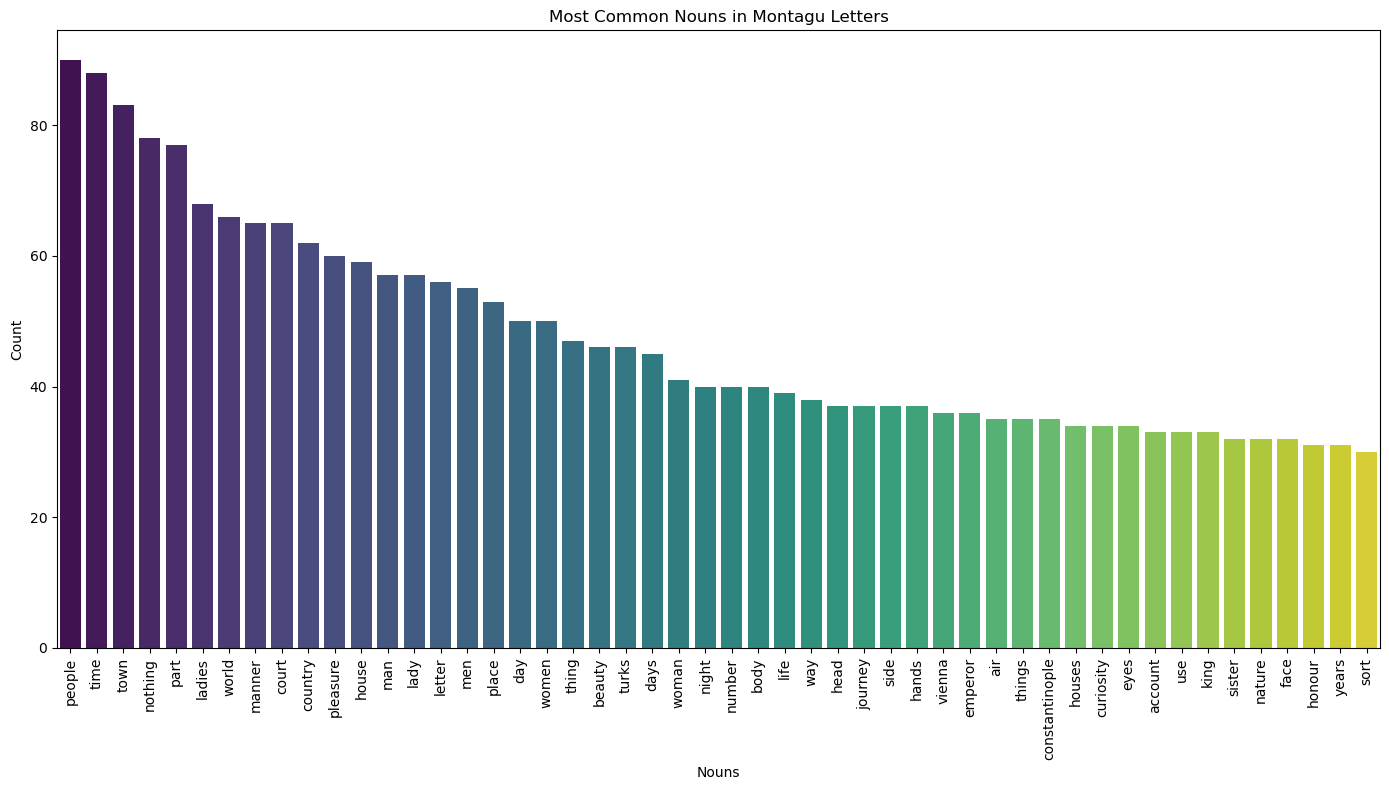

In [67]:
# Let's visualize the most common 50 nouns in a bar chart using seaborn
# Get the most common nouns and their counts
most_common_nouns = noun_counts.most_common(50)
nouns, counts = zip(*most_common_nouns)
plt.figure(figsize=(14, 8)) # slightly bigger figure size for better readability
sns.barplot(x=list(nouns), y=list(counts), palette='viridis') # color palette for better aesthetics
plt.xlabel('Nouns')
plt.ylabel('Count')
plt.title('Most Common Nouns in Montagu Letters')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Nouns already tell a different story about our data. In many ways, they get us closer to the contents of these texts

## Stemming and Lemmatization

When we take a look at the top 50 words, what we see is that there are some plural and singular nouns. For example men and man both appear in this data. 

In some cases, this kind of information is super super useful. In other cases however we might want to turn all nouns into their singular forms to count them.

More generally, this is a text normalization task called lemmatization. Lemmatization is the task of turning inflected words into their dictionary forms. An alternative, more of a shortcut version of this task is stemming.

[What's the difference between stemming and lemmatizing?](https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming)

"**Stemming** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. **Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

If confronted with the token "saw", **stemming** might return just "s", whereas **lemmatization** would attempt to return either "see" or "saw" depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma." See [this post](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) for more information.

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [ ]:
# We will do this with spaCy https://spacy.io/ and https://spacy.io/api/lemmatizer

import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])  # Disable NER and text classification for speed


In [ ]:
# Let's get the first letter from the dataset to test our spaCy implementation
letter_1 = montagu['body_cleaned'].iloc[0]

In [ ]:
doc = nlp(letter_1)  # Process the letter with spaCy

In [ ]:
doc[:10]  # Display the first 10 tokens in the document

In [ ]:
letter_1.split()

In [ ]:
# Let's check the word at index 13 in the letter and 16 in the lemma
# they are the same word, the difference is because of the comma
print(letter_1.split()[13])  # Display the word at index 16
print(doc[16].lemma_)

In [ ]:
# Let's get all our lemmas
lemmatized_tokens = [token.lemma_ for token in doc]

In [ ]:
# Let's create a tuple of the original word and its lemmatized form
lemmatized_pairs = [(token.text, token.lemma_) for token in doc if token.is_alpha]
# Display the first 10 lemmatized pairs
print(lemmatized_pairs[:10])

In [ ]:
# Let's print the one that have changed side by side for better readability
for original, lemma in lemmatized_pairs:
    if original != lemma:  # Only print pairs where the original and lemma are different
        print(f"{original} -> {lemma}")